In [1]:
import numpy as np
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False 

import jieba
import jieba.analyse as anls
from snownlp import SnowNLP
from wordcloud import WordCloud

In [2]:
comment = pd.read_csv('douwei.csv', dtype={'content' : str})

E:\IDE\Anaconda3\envs\iSpider\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


E:\IDE\Anaconda3\envs\iSpider\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


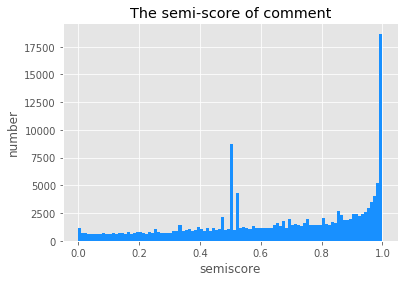

In [3]:
plt.hist(comment['semiscore'], bins=np.arange(0, 1.01, 0.01), label='semisocre', color='#1890FF')
plt.xlabel("semiscore")
plt.ylabel("number")
plt.title("The semi-score of comment")
plt.show()

In [4]:
semilabel = comment['semilabel'].value_counts()
semilabel = semilabel.loc[[1, -1]]

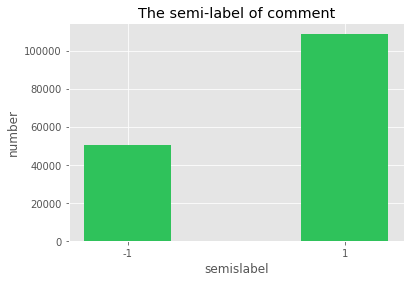

In [5]:
plt.bar(semilabel.index, semilabel.values, tick_label=semilabel.index, color='#2FC25B')
plt.xlabel("semislabel")
plt.ylabel("number")
plt.title("The semi-label of comment")
plt.show()

In [6]:
comment_list = comment['content'].tolist()

In [7]:
text = ''.join(str(s) for s in comment['content'] if s not in [None])

In [8]:
jieba.add_word('窦唯')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\gaiusyao\AppData\Local\Temp\jieba.cache
Loading model cost 0.898 seconds.
Prefix dict has been built succesfully.


In [9]:
word_list = jieba.cut(text, cut_all=False)

In [10]:
stopwords = [line.strip() for line in open('stopwords.txt',encoding='UTF-8').readlines()]

In [11]:
clean_list = [seg for seg in word_list if seg not in stopwords]

In [12]:
clean_text = ''.join(clean_list)

In [13]:
cloud = WordCloud(  
    font_path = 'F:\asset\fonts\FZBYSK.TTF',   
    background_color = 'white',  
    max_words = 1000,  
    max_font_size = 64       
) 
word_cloud = cloud.generate(clean_text) 

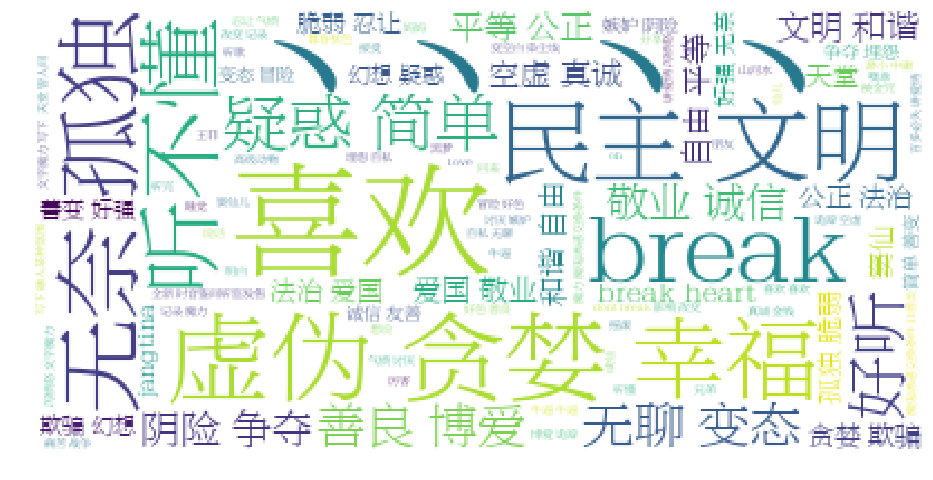

In [14]:
plt.figure(figsize=(16, 16))
plt.imshow(word_cloud)  
plt.axis('off')  
plt.show()

In [15]:
for x, w in anls.extract_tags(clean_text, topK=30, withWeight=True):
    print('{0}: {1}'.format(x, w))

喜欢: 0.07174921826661623
摇滚: 0.06222465433996381
好听: 0.048331581166697744
仙儿: 0.04814604948274102
王菲: 0.04271112348151552
窦仙: 0.027324893954643947
听不懂: 0.01956956751188709
幸福: 0.014775956892430308
成仙: 0.01465450183828875
汪峰: 0.014175488038594907
大仙: 0.013705819518861267
高级: 0.013225888298888759
黑梦: 0.013076421076696725
前奏: 0.012872688959687885
黑豹: 0.012540924545728218
听歌: 0.012455923064269991
艳阳天: 0.012455923064269991
动物: 0.012396754282072616
听听: 0.012369319024839337
听懂: 0.01160376390830011
吉他: 0.01142745810497296
忘词: 0.011296092030755316
歌曲: 0.011181124179616048
希望: 0.01089713506654457
理解: 0.010537493766491456
厉害: 0.0104225740491279
哀伤: 0.009602942087618863
窦靖童: 0.009406198340815812
电影: 0.009266377909595709
送别: 0.008950847971089923
